In [11]:
import pandas as pd

bl = pd.read_csv("Mean_BL.csv")
lr = pd.read_csv("Mean_LR.csv")

display(bl)
display(lr)

,Baseline,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.848716,0.865788,0.857297,0.846847,0.862440,0.861611
1,BleuScore,3.904092,2.711751,4.454666,4.692407,5.005882,4.938997
2,Grammar,0.800676,0.229730,1.043919,7.418919,1.152027,0.692568
3,MiniLM,0.711813,0.696220,0.730185,0.738310,0.735988,0.705222
4,MPNet,0.784517,0.754686,0.801201,0.798482,0.802288,0.769646
5,WordValidity,0.192139,0.191157,0.178081,0.191554,0.168854,0.177682


,LoRA,Gemma,Falcon,Llama,Qwen,Mistral,Granite
0,BertScoreF1,0.855290,0.879251,0.851719,0.837936,0.868268,0.827495
1,BleuScore,7.389509,8.717132,6.435348,3.758860,9.430999,3.965899
2,Grammar,4.260870,0.578595,5.137124,13.143813,2.695652,28.993311
3,MiniLM,0.755272,0.763320,0.685461,0.717318,0.759619,0.575163
4,MPNet,0.819153,0.823599,0.725221,0.773968,0.818186,0.622247
5,WordValidity,0.175469,0.186011,0.174247,0.202119,0.179116,0.269651


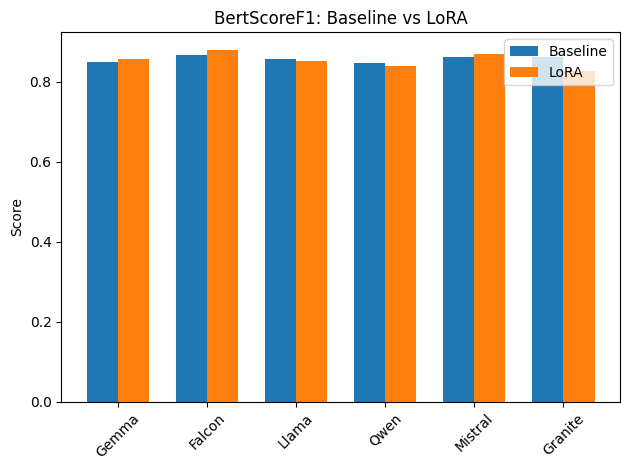

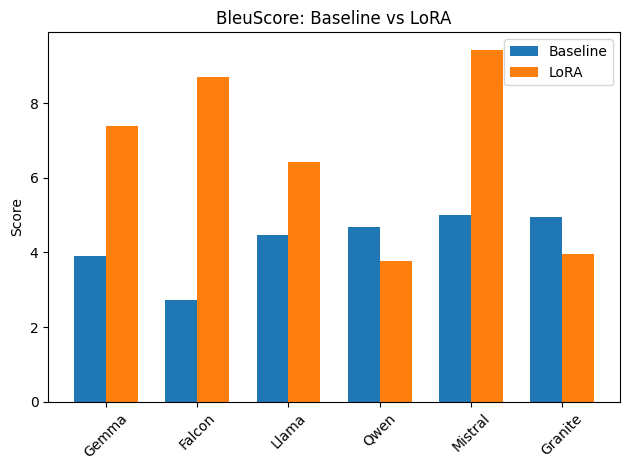

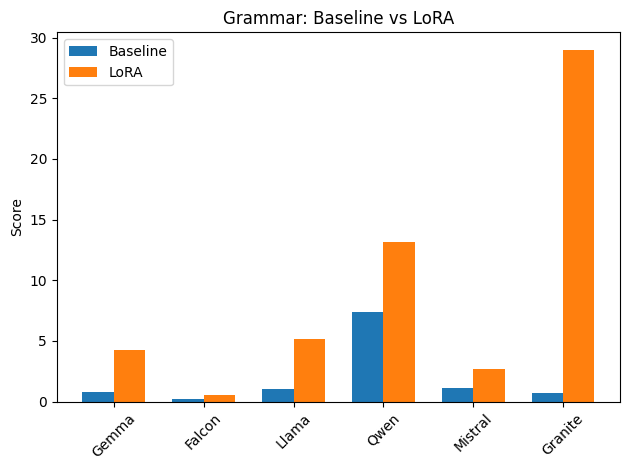

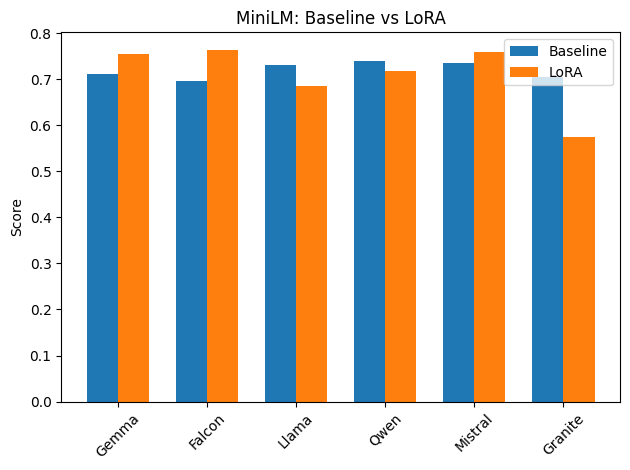

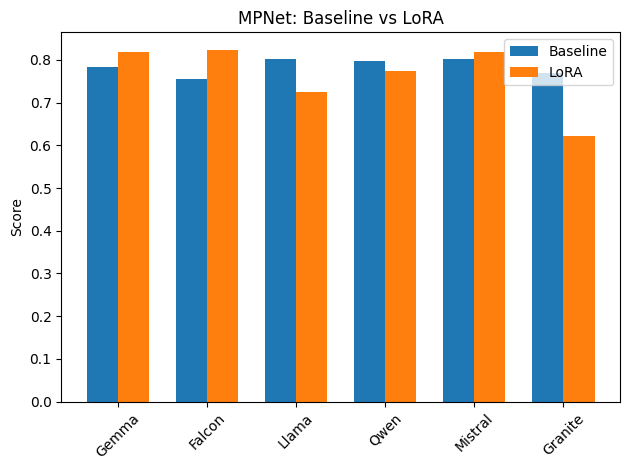

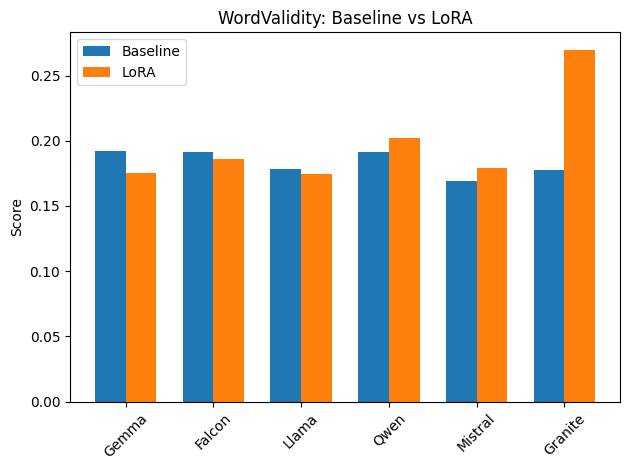

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Read CSVs
df_baseline = pd.read_csv("Mean_BL.csv")
df_lora = pd.read_csv("Mean_LR.csv")

# Output folder
output_dir = "baseline_vs_lora_plots"
os.makedirs(output_dir, exist_ok=True)

# Ensure same order
assert (df_baseline["Baseline"] == df_lora["LoRA"]).all()

metrics = df_baseline["Baseline"]
models = df_baseline.columns[1:]  # skip Metric column

# Loop through each row (metric)
for i, metric in enumerate(metrics):
    baseline_vals = df_baseline.loc[i, models].values.astype(float)
    lora_vals = df_lora.loc[i, models].values.astype(float)

    x = np.arange(len(models))
    width = 0.35

    plt.figure()
    plt.bar(x - width/2, baseline_vals, width, label="Baseline")
    plt.bar(x + width/2, lora_vals, width, label="LoRA")

    plt.xticks(x, models, rotation=45)
    plt.ylabel("Score")
    plt.title(f"{metric}: Baseline vs LoRA")
    plt.legend()

    plt.tight_layout()

    # Save figure
    filename = f"{metric}_baseline_vs_lora.png"
    plt.savefig(os.path.join(output_dir, filename), dpi=300)
    plt.show()
    plt.close()  # IMPORTANT: free memory
